<a href="https://colab.research.google.com/github/Fadiabdf/OPT/blob/main/TP5/Solution_bas%C3%A9e_sur_hyperheuristique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Equipe : N°1**
### Groupe : SIQ1
### Memebres d'équipe  :


1.   Herkat wifak
2.   Boudiaf fadia
3.   zoutat marwa
4.   Hamed Hiba
5.   Larbaoui yasmine
6.   Merabet Mohammed


---

# ***Analyse détaillée de l'algorithme Hyperheuristique Génétique pour le PVC***

Cet algorithme est une implémentation sophistiquée d'une hyperheuristique génétique pour résoudre le Problème du Voyageur de Commerce (PVC). Voici une analyse approfondie de son fonctionnement :
## 1. Structure générale
texte en gras
L'algorithme combine plusieurs techniques avancées :
*   Hyperheuristique : Méta-algorithme qui choisit et combine des heuristiques de bas niveau
*   Algorithme génétique : Optimisation inspirée de l'évolution biologique
*   Méthodes de construction et perturbation : Diverses heuristiques pour le PVC

## 2. Composants principaux
###a. Chargement des données (load_pvc_instance)

*   Lit un fichier XML contenant les distances entre villes
*   Construit une matrice de distances symétrique
*   Gère les erreurs de chargement

### b. Classe PVCProblem

*   Évaluation des solutions : Calcule la distance totale d'un circuit avec mise en cache

*   Visualisation : Méthode pour afficher graphiquement les solutions
*   Optimisation : Utilise un cache pour éviter des calculs redondants  

### c. Heuristiques de construction


*   Cheapest Insertion : Insère les villes au meilleur coût immédiat
*   Farthest Insertion : Commence par les villes les plus éloignées
*   Nearest Neighbor : Construit en ajoutant le voisin le plus proche
*   Random Construction : Solution aléatoire de base
*   Greedy Cycle : Approche gloutonne cyclique

### d. Heuristiques de perturbation


*   3-opt Swap : Échange complexe de 3 arêtes
*   Lin-Kernighan simplifié : Version allégée de cette célèbre heuristique
*   2-opt Swap : Échange simple de 2 arêtes
*   Swap Cities : Échange aléatoire de deux villes
*   Insertion Heuristic : Réinsertion aléatoire d'une ville


### e. MiniHyperHeuristicGA (Cœur de l'algorithme)

Une hyperheuristique de génération a pour objectif de générer automatiquement des solutions en combinant des heuristiques de base :


*   Population d'individus représentant des combinaisons d'heuristiques (construction + perturbation).
*   Mécanismes évolutifs : sélection, croisement, mutation
*   Fait évoluer la population pour trouver la meilleure combinaison.
*   Évalue leur performance.
*   Suivi des performances des méthodes




---

## 3. Fonctionnement détaillé
### a. Initialisation
*   Crée une population diversifiée combinant heuristiques de construction et perturbation
*   Initialise les scores (Score d'une méthode : Somme des améliorations qu'elle a apportées (différence de fitness avant/après son application)    )

 et métriques de suivi (meilleure fitness, moyenne, utilisation des méthodes)


### b. Évaluation
Pour chaque individu :


*   Applique sa méthode de construction
*   Mesure l'amélioration apportée (Fitness avant - Fitness après (si résultat positif = amélioration))
*   Applique sa méthode de perturbation
*   Mesure à nouveau l'amélioration
*   Met à jour les scores des méthodes


- Normalisation des scores :
  * Les scores des méthodes sont divisés par leur nombre d'utilisations
  * Permet une comparaison équitable entre méthodes fréquemment/rarement utilisées
  * Évite la domination des méthodes souvent sélectionnées

### c. Sélection

Utilise un tournoi biaisé qui considère :
*   La qualité de la solution (70%) ( Fitness de la solution (distance totale) )
*   La diversité de la combinaison (30%) ( Rareté de la combinaison d'heuristiques dans la population)

- Sélection des méthodes mutées :
  * 70% de probabilité de choisir parmi les top 50% des méthodes
  * 30% de probabilité de choisir aléatoirement (maintien de la diversité)

Favorise ainsi à la fois performance et exploration

### d. Croisement
Sélectionne les méthodes des parents de manière pondérée selon :
*   Leur score historique de performance
*   Avec protection contre les valeurs extrêmes

### e. Mutation

Taux de mutation adaptatif qui dépend :

*   De l'âge de l'individu (plus il est vieux, plus il mute)
*   De la stagnation globale

--> Âge : Nombre de générations depuis la création de l'individu

--> Stagnation : Nombre de générations sans amélioration

--> Taux mutation = 20% (base) + min(60%, âge/10) + min(30%, stagnation/10)

Privilégie (70%) les méthodes ayant bien performé

### f. Gestion de la population


*   Élitisme : conserve le meilleur individu
*   Remplacement générationnel complet
*   suivi de la stagnation pour adaptation

En cas de stagnation prolongée (≥ 15 générations), une réinitialisation partielle est déclenchée :

*   Conservation des 5 meilleurs individus (élitisme renforcé)
*   Création de nouveaux individus à partir des meilleures heuristiques
*   Permet d’éviter le blocage dans un optimum local


## 4. Innovations et optimisations


*   Cache d'évaluation : Mémorise les évaluations déjà calculées pour éviter de recalculer la même solution.

*   Métriques avancées :


  1.  Suivi des performances par méthode (Score cumulé des améliorations attribuables à chaque heuristique.)
  2.  Analyse de diversité des combinaisons
  3.  Tracking de l'âge des individus



  

*   Sélection équilibrée entre exploitation et exploration
*   Mutation adaptative qui réagit à la stagnation (70% : Choix parmi les méthodes les mieux notées , 30% : Exploration aléatoire)




## 5. Flux d'exécution principal
*   Charge l'instance PVC depuis XML
*   Initialise le problème et l'hyperheuristique
*   Exécute les générations successives :

       Évaluation

       Sélection

       Croisement

       Mutation



*   Affiche les résultats et visualisations
*   Compare les combinaisons d'heuristiques


## 6. Points forts

*   Flexibilité : Peut incorporer facilement de nouvelles heuristiques
*   Adaptabilité : Apprend quelles méthodes fonctionnent bien pour l'instance donnée
*   Équilibre entre intensification et diversification


Cet algorithme ne se contente pas de trouver une bonne solution, il apprend quelle combinaison d’heuristiques fonctionne le mieux, ce qui est l’objectif central d’une hyperheuristique de génération



In [ ]:
"""
Hyperheuristique Génétique  pour le Problème du Voyageur de Commerce (PVC)

Cette implémentation ultra-simplifiée inclut:
- Heuristiques de construction: Cheapest Insertion, Farthest Insertion et autres
- Heuristiques de perturbation: 3-opt, Lin-Kernighan simplifié et autres
- Optimisations pour performance: cache d'évaluation, moins d'itérations
"""

import numpy as np
import random
import matplotlib.pyplot as plt
import time
import xml.etree.ElementTree as ET
from copy import deepcopy


# Bloc1 : Chargement des Données

In [ ]:

# --------------------------------------------------------------
# LECTURE ET GESTION DES DONNÉES D'INSTANCE PVC
# --------------------------------------------------------------

def load_pvc_instance(xml_file):
    """Charge une instance PVC depuis un fichier XML"""
    try:
        problem = ET.parse(xml_file)
        root = problem.getroot()
        graphe = {}

        for i, sommet in enumerate(root.find('graph').findall('vertex')):
            aretes = {}
            for arete in sommet.findall('edge'):
                cible = int(arete.text)
                cout = float(arete.get('cost'))
                aretes[cible] = cout
            graphe[i] = aretes

        nombre_sommets = len(graphe)
        print(f"Instance chargée: {nombre_sommets} villes")

        matrice_distances = np.full((nombre_sommets, nombre_sommets), np.inf)
        for i, aretes in graphe.items():
            for j, cout in aretes.items():
                matrice_distances[i, j] = cout

        np.fill_diagonal(matrice_distances, 0)

        return matrice_distances

    except Exception as e:
        print(f"Erreur lors du chargement de l'instance: {e}")
        raise


# Bloc2 : Classe du Problème PVC

In [ ]:
# --------------------------------------------------------------
# CLASSE PRINCIPALE DU PROBLÈME PVC
# --------------------------------------------------------------

class PVCProblem:
    """Classe représentant une instance du problème du voyageur de commerce."""

    def __init__(self, distance_matrix):
        """Initialise le problème PVC avec une matrice de distances."""
        self.distance_matrix = distance_matrix
        self.num_cities = distance_matrix.shape[0]
        self.cities = np.random.rand(self.num_cities, 2) * 100
        self.eval_cache = {}  # Cache des évaluations

    def evaluate(self, solution):
        """Évalue la qualité d'une solution (distance totale du circuit)."""
        # Vérifier le cache
        key = tuple(solution)
        if key in self.eval_cache:
            return self.eval_cache[key]

        # Calculer la distance totale
        total_distance = 0
        for i in range(len(solution)):
            from_city = solution[i-1]
            to_city = solution[i]
            total_distance += self.distance_matrix[from_city, to_city]

        # Mettre en cache
        self.eval_cache[key] = total_distance
        return total_distance

    def plot_solution(self, solution, title="Solution PVC"):
        """Dessine une visualisation graphique d'une solution."""
        plt.figure(figsize=(10, 8))
        plt.scatter(self.cities[:, 0], self.cities[:, 1], c='red', s=100)

        for i in range(len(solution)):
            start = self.cities[solution[i-1]]
            end = self.cities[solution[i]]
            plt.plot([start[0], end[0]], [start[1], end[1]], 'b-', linewidth=1)
            plt.text(start[0], start[1], str(solution[i-1]), fontsize=8)

        plt.title(f"{title} (Distance: {self.evaluate(solution):.2f})")
        plt.show()


# Bloc 3: Heuristiques de Construction

In [ ]:
# --------------------------------------------------------------
# HEURISTIQUES DE CONSTRUCTION
# --------------------------------------------------------------

def cheapest_insertion(problem, current_solution=None):
    """Construction par insertion au coût minimal."""
    if current_solution is None or len(current_solution) == 0:
        current_solution = [random.randint(0, problem.num_cities-1)]

    unvisited = set(range(problem.num_cities)) - set(current_solution)

    while unvisited:
        best_cost = float('inf')
        best_city = None
        best_pos = None

        # Échantillonnage aléatoire pour accélérer (facultatif pour les petites instances)
        candidate_cities = list(unvisited)
        if len(candidate_cities) > 20:  # Échantillonnage pour les grandes instances
            candidate_cities = random.sample(candidate_cities, 20)

        for city in candidate_cities:
            for pos in range(1, len(current_solution) + 1):
                prev = current_solution[pos-1]
                next_city = current_solution[0] if pos == len(current_solution) else current_solution[pos]
                cost = (problem.distance_matrix[prev, city] +
                        problem.distance_matrix[city, next_city] -
                        problem.distance_matrix[prev, next_city])

                if cost < best_cost:
                    best_cost = cost
                    best_city = city
                    best_pos = pos

        if best_city is not None:
            current_solution.insert(best_pos, best_city)
            unvisited.remove(best_city)

    return current_solution

def farthest_insertion(problem, current_solution=None):
    """Construction en insérant d'abord les villes les plus éloignées."""
    if current_solution is None or len(current_solution) == 0:
        current_solution = [random.randint(0, problem.num_cities-1)]

    unvisited = set(range(problem.num_cities)) - set(current_solution)

    # Ajouter la ville la plus éloignée si on n'a qu'une seule ville
    if len(current_solution) == 1:
        start = current_solution[0]
        farthest = max(unvisited, key=lambda c: problem.distance_matrix[start, c])
        current_solution.append(farthest)
        unvisited.remove(farthest)

    while unvisited:
        # Trouver la ville non visitée la plus éloignée du circuit
        max_min_dist = -float('inf')
        farthest_city = None

        # Échantillonnage pour accélérer (facultatif)
        candidate_cities = list(unvisited)
        if len(candidate_cities) > 20:
            candidate_cities = random.sample(candidate_cities, 20)

        for city in candidate_cities:
            min_dist = min(problem.distance_matrix[city, c] for c in current_solution)
            if min_dist > max_min_dist:
                max_min_dist = min_dist
                farthest_city = city

        # Trouver la meilleure position d'insertion
        best_pos = None
        best_cost = float('inf')

        for pos in range(1, len(current_solution) + 1):
            prev = current_solution[pos-1]
            next_city = current_solution[0] if pos == len(current_solution) else current_solution[pos]
            cost = (problem.distance_matrix[prev, farthest_city] +
                    problem.distance_matrix[farthest_city, next_city] -
                    problem.distance_matrix[prev, next_city])

            if cost < best_cost:
                best_cost = cost
                best_pos = pos

        current_solution.insert(best_pos, farthest_city)
        unvisited.remove(farthest_city)

    return current_solution

def nearest_neighbor(problem, current_solution=None):
    """Construction où chaque ville choisit son plus proche voisin."""
    if current_solution is None or len(current_solution) == 0:
        current_solution = [random.randint(0, problem.num_cities-1)]

    unvisited = set(range(problem.num_cities)) - set(current_solution)

    while unvisited:
        last = current_solution[-1]
        next_city = min(unvisited, key=lambda city: problem.distance_matrix[last, city])
        current_solution.append(next_city)
        unvisited.remove(next_city)

    return current_solution

def random_construction(problem, current_solution=None):
    """Construction aléatoire du circuit."""
    cities = list(range(problem.num_cities))
    random.shuffle(cities)
    return cities

def greedy_cycle(problem, current_solution=None):
    """Construction par cycle glouton."""
    n = problem.num_cities
    if current_solution is None or len(current_solution) == 0:
        solution = [random.randint(0, n-1)]
    else:
        solution = current_solution.copy()

    unvisited = set(range(n)) - set(solution)

    while unvisited:
        best_city = min(unvisited, key=lambda c: min(problem.distance_matrix[c, s] for s in solution))
        solution.append(best_city)
        unvisited.remove(best_city)

    return solution


# Bloc 4 :Heuristiques de Perturbation

In [ ]:

# --------------------------------------------------------------
# HEURISTIQUES DE PERTURBATION
# --------------------------------------------------------------

def three_opt_swap(problem, solution, max_iterations=30):
    """Amélioration par 3-opt (échange de 3 arêtes)."""
    best = solution.copy()
    n = len(solution)

    for _ in range(max_iterations):
        improved = False

        # Essayer un 3-opt aléatoire
        i, j, k = sorted(random.sample(range(n), 3))

        # Éviter les cas dégénérés
        if j-i <= 1 or k-j <= 1:
            continue

        # Configurations possibles (cas les plus courants du 3-opt)
        configs = [
            best,  # Original
            best[:i+1] + best[i+1:j+1][::-1] + best[j+1:],  # 2-opt segments 1-2
            best[:i+1] + best[i+1:j+1] + best[j+1:k+1][::-1] + best[k+1:],  # 2-opt segments 2-3
            best[:i+1] + best[j+1:k+1] + best[i+1:j+1] + best[k+1:]  # 3-opt réarrangement
        ]

        # Évaluer les configurations
        best_config = min(configs, key=lambda x: problem.evaluate(x))

        if problem.evaluate(best_config) < problem.evaluate(best):
            best = best_config
            improved = True

        if improved:
            break  # Stratégie "premier améliorant"

    return best

def lin_kernighan_simple(problem, solution, max_iterations=20):
    """Version très simplifiée de Lin-Kernighan."""
    best = solution.copy()
    best_distance = problem.evaluate(best)
    n = len(solution)

    for _ in range(max_iterations):
        current = best.copy()

        # Choisir un point de départ aléatoire
        i = random.randint(0, n-1)

        # Essayer quelques échanges 2-opt
        improved = False
        for j in range(i+2, i+n-1):
            j = j % n  # Assurer que j est dans les limites

            # 2-opt: inverser le segment entre i et j
            new_solution = current[:i+1] + current[i+1:j+1][::-1] + current[j+1:]
            distance = problem.evaluate(new_solution)

            if distance < problem.evaluate(current):
                current = new_solution
                improved = True
                break  # Premier améliorant

        # Mettre à jour la meilleure solution
        if problem.evaluate(current) < best_distance:
            best = current
            best_distance = problem.evaluate(best)

    return best

def two_opt_swap(problem, solution, max_iter=30):
    """Amélioration par 2-opt (échange de 2 arêtes)."""
    best = solution.copy()
    best_distance = problem.evaluate(best)

    for _ in range(max_iter):
        # Sélectionner deux indices aléatoires
        i, j = sorted(random.sample(range(len(solution)), 2))

        # Éviter les cas dégénérés
        if j - i <= 1:
            continue

        # Créer une nouvelle solution en inversant le segment entre i et j
        new_solution = best[:i] + best[i:j][::-1] + best[j:]

        # Évaluer la nouvelle solution
        new_distance = problem.evaluate(new_solution)

        # Mettre à jour si amélioration
        if new_distance < best_distance:
            best = new_solution
            best_distance = new_distance

    return best

def swap_cities(problem, solution):
    """Échange deux villes aléatoires dans le circuit."""
    # Copier la solution pour éviter de modifier l'original
    new_solution = solution.copy()

    # Sélectionner deux positions aléatoires
    i, j = random.sample(range(len(new_solution)), 2)

    # Échanger les villes
    new_solution[i], new_solution[j] = new_solution[j], new_solution[i]

    return new_solution

def insertion_heuristic(problem, solution):
    """Retire une ville et la réinsère ailleurs dans le circuit."""
    # Copier la solution
    new_solution = solution.copy()

    # Sélectionner deux positions aléatoires
    i, j = random.sample(range(len(new_solution)), 2)

    # Retirer une ville et la réinsérer
    city = new_solution.pop(i)
    new_solution.insert(j, city)

    return new_solution


# Bloc 5 : Classe Hyperheuristique

In [ ]:
# --------------------------------------------------------------
# HYPERHEURISTIQUE GÉNÉTIQUE ULTRA-SIMPLIFIÉE
# --------------------------------------------------------------

class MiniHyperHeuristicGA:
    """Implémentation ultra-simplifiée d'une hyperheuristique génétique pour le PVC."""

    def __init__(self, problem, population_size=20, generations=30):
        """Initialise l'hyperheuristique génétique simplifiée."""
        self.problem = problem
        self.population_size = population_size
        self.generations = generations

        # Méthodes disponibles (toutes nos heuristiques)
        self.construction_methods = [
            cheapest_insertion,
            farthest_insertion,
            nearest_neighbor,
            random_construction,
            greedy_cycle
        ]

        self.perturbation_methods = [
            three_opt_swap,
            lin_kernighan_simple,
            two_opt_swap,
            swap_cities,
            insertion_heuristic
        ]

        # Scores des méthodes
        self.method_scores = {m.__name__: 0 for m in
                             self.construction_methods + self.perturbation_methods}

        # Initialiser la population
        self.population = self._initialize_population()

        # Variables de suivi
        self.best_fitness = float('inf')
        self.best_individual = None
        self.stagnation_counter = 0

        # Métriques
        self.metrics = {
            'best_fitness': [],
            'avg_fitness': [],
            'method_usage': {m.__name__: 0 for m in
                          self.construction_methods + self.perturbation_methods}
        }

    def _initialize_population(self):
        """Initialise la population avec diversité."""
        population = []

        # Combiner chaque méthode de construction avec chaque méthode de perturbation
        for constr in self.construction_methods:
            for perturb in self.perturbation_methods:
                # Créer plusieurs individus avec chaque combinaison
                for _ in range(self.population_size // (len(self.construction_methods) * len(self.perturbation_methods)) + 1):
                    if len(population) < self.population_size:
                        population.append({
                            'construction': constr,
                            'perturbation': perturb,
                            'fitness': None,
                            'solution': None,
                            'age': 0  # Ajout d'un compteur d'âge pour la mutation adaptative
                        })

        # S'assurer que la population a la bonne taille
        while len(population) > self.population_size:
            population.pop()

        return population

    def evaluate_individual(self, individual):
        """Évalue un individu en appliquant ses méthodes et mesure leur impact."""
        # Appliquer la méthode de construction
        solution = individual['construction'](self.problem, None)

        # Mesurer l'impact de la construction (par rapport à une solution de référence)
        construction_fitness = self.problem.evaluate(solution)

        # Pour éviter les scores infinis et avoir une référence cohérente,
        # on utilise une solution de référence basée sur une heuristique différente
        # de celle testée (pour éviter le biais)
        if individual['construction'].__name__ == 'random_construction':
            # Si on teste random_construction, utiliser nearest_neighbor comme référence
            reference_solution = nearest_neighbor(self.problem, None)
        else:
            # Sinon, utiliser random_construction comme référence
            reference_solution = random_construction(self.problem, None)

        reference_fitness = self.problem.evaluate(reference_solution)

        # Amélioration de la construction par rapport à la référence
        construction_improvement = max(0, reference_fitness - construction_fitness)

        # Mettre à jour le score de la méthode de construction (limiter pour éviter l'inflation)
        improvement_capped = min(construction_improvement, 10000)  # Plafonner à 10000
        self.method_scores[individual['construction'].__name__] += improvement_capped

        # Comptabiliser l'utilisation
        self.metrics['method_usage'][individual['construction'].__name__] += 1

        # Appliquer la méthode de perturbation
        old_fitness = construction_fitness
        solution = individual['perturbation'](self.problem, solution)

        # Mesurer l'impact de la perturbation
        new_fitness = self.problem.evaluate(solution)
        perturbation_improvement = old_fitness - new_fitness

        # Mettre à jour le score de la méthode de perturbation (avec plafond)
        improvement_capped = max(-1000, min(perturbation_improvement, 1000))  # Entre -1000 et +1000
        self.method_scores[individual['perturbation'].__name__] += improvement_capped

        # Comptabiliser l'utilisation
        self.metrics['method_usage'][individual['perturbation'].__name__] += 1

        # Enregistrer la fitness et la solution
        individual['fitness'] = new_fitness
        individual['solution'] = solution

        # Incrementer l'âge de l'individu
        individual['age'] = individual.get('age', 0) + 1

        return new_fitness

    def evaluate_population(self):
        """Évalue tous les individus de la population."""
        for individual in self.population:
            self.evaluate_individual(individual)

    def select_parents(self):
        """
        Sélection par tournoi avec composante de diversité.
        Favorise à la fois les individus performants et ceux qui utilisent
        des combinaisons d'heuristiques peu communes.
        """
        tournament_size = min(3, len(self.population))
        parents = []

        # Identifier toutes les combinaisons d'heuristiques utilisées dans la population
        combinations = {}
        for ind in self.population:
            key = (ind['construction'].__name__, ind['perturbation'].__name__)
            combinations[key] = combinations.get(key, 0) + 1

        for _ in range(2):
            tournament = random.sample(self.population, tournament_size)

            # Calculer un score combiné pour chaque individu (fitness + diversité)
            tournament_scores = []
            for ind in tournament:
                # Score de fitness (inversé car on minimise)
                # Éviter division par zéro avec +1, et protéger contre NaN avec max
                fitness_score = 1.0 / max(1.0, ind['fitness'])

                # Score de diversité (inversement proportionnel à la fréquence de cette combinaison)
                key = (ind['construction'].__name__, ind['perturbation'].__name__)
                freq = combinations.get(key, 0)
                diversity_score = 1.0 / max(1.0, freq)  # Max pour éviter division par zéro

                # Score combiné (70% fitness, 30% diversité)
                combined_score = 0.7 * fitness_score + 0.3 * diversity_score
                tournament_scores.append(combined_score)

            # Protéger contre les valeurs NaN ou infinies
            if not all(np.isfinite(s) for s in tournament_scores):
                # Si scores problématiques, revenir à la sélection basée uniquement sur fitness
                winner = min(tournament, key=lambda x: x['fitness'])
            else:
                # Sélectionner l'individu avec le meilleur score combiné
                best_idx = tournament_scores.index(max(tournament_scores))
                winner = tournament[best_idx]

            parents.append(winner)

        return parents

    def crossover(self, parent1, parent2):
        """
        Croisement guidé par performance entre deux parents.
        Les méthodes ayant les meilleurs scores ont plus de chances d'être sélectionnées.
        """
        # Options disponibles pour la construction
        construction_options = [parent1['construction'], parent2['construction']]

        # Calculer les probabilités basées sur les scores
        constr_scores = [self.method_scores[m.__name__] for m in construction_options]

        # Conversion des scores pour garantir des valeurs positives
        min_score = min(constr_scores)
        if min_score <= 0:  # S'assurer que toutes les valeurs sont strictement positives
            constr_scores = [s - min_score + 1.0 for s in constr_scores]

        # Protection contre les valeurs NaN ou infinies
        if not all(np.isfinite(s) for s in constr_scores) or sum(constr_scores) == 0:
            # En cas de problème, utiliser une distribution uniforme
            selected_construction = random.choice(construction_options)
        else:
            # Normaliser pour obtenir des probabilités
            total_score = sum(constr_scores)
            constr_probs = [s/total_score for s in constr_scores]

            # Sélection pondérée pour la construction
            selected_construction = random.choices(
                construction_options,
                weights=constr_probs,
                k=1
            )[0]

        # Même processus pour la perturbation
        perturbation_options = [parent1['perturbation'], parent2['perturbation']]
        perturb_scores = [self.method_scores[m.__name__] for m in perturbation_options]

        # Conversion des scores
        min_score = min(perturb_scores)
        if min_score <= 0:
            perturb_scores = [s - min_score + 1.0 for s in perturb_scores]

        # Protection contre les valeurs NaN ou infinies
        if not all(np.isfinite(s) for s in perturb_scores) or sum(perturb_scores) == 0:
            # En cas de problème, utiliser une distribution uniforme
            selected_perturbation = random.choice(perturbation_options)
        else:
            # Normaliser
            total_score = sum(perturb_scores)
            perturb_probs = [s/total_score for s in perturb_scores]

            # Sélection pondérée pour la perturbation
            selected_perturbation = random.choices(
                perturbation_options,
                weights=perturb_probs,
                k=1
            )[0]

        # Créer l'enfant avec les méthodes sélectionnées
        child = {
            'construction': selected_construction,
            'perturbation': selected_perturbation,
            'fitness': None,
            'solution': None,
            'age': 0  # Nouvel individu, âge 0
        }

        return child

    def mutate(self, individual):
        """
        Mutation adaptative dont le taux augmente avec l'âge de l'individu
        et la stagnation globale.
        """
        # Taux de base
        base_rate = 0.2

        # Facteur d'âge: plus l'individu est vieux, plus il a de chances de muter
        age_factor = min(0.6, individual.get('age', 0) / 10.0)

        # Facteur de stagnation: si la population stagne, augmenter le taux
        stagnation_factor = min(0.3, self.stagnation_counter / 10.0)

        # Taux final de mutation
        mutation_rate = base_rate + age_factor + stagnation_factor

        # Mutation de la méthode de construction
        if random.random() < mutation_rate:
            # Trier les méthodes par score pour favoriser les plus performantes
            sorted_constructions = sorted(
                self.construction_methods,
                key=lambda m: self.method_scores.get(m.__name__, 0),
                reverse=True
            )

            # 70% du temps, choisir parmi les meilleures méthodes
            if random.random() < 0.7:
                # Prendre parmi les meilleures (top 50%)
                top_count = max(1, len(sorted_constructions) // 2)
                individual['construction'] = random.choice(sorted_constructions[:top_count])
            else:
                # Exploration: choisir aléatoirement
                individual['construction'] = random.choice(self.construction_methods)

        # Mutation de la méthode de perturbation (même logique)
        if random.random() < mutation_rate:
            sorted_perturbations = sorted(
                self.perturbation_methods,
                key=lambda m: self.method_scores.get(m.__name__, 0),
                reverse=True
            )

            if random.random() < 0.7:
                top_count = max(1, len(sorted_perturbations) // 2)
                individual['perturbation'] = random.choice(sorted_perturbations[:top_count])
            else:
                individual['perturbation'] = random.choice(self.perturbation_methods)

        return individual

    def run(self):
        """Exécute l'hyperheuristique génétique simplifiée."""
        print(f"Démarrage de l'hyperheuristique génétique pour {self.generations} générations")

        start_time = time.time()
        self.stagnation_counter = 0

        for gen in range(self.generations):
            # Évaluer la population
            self.evaluate_population()

            # Trouver le meilleur individu
            current_best = min(self.population, key=lambda x: x['fitness'])
            current_avg = sum(ind['fitness'] for ind in self.population) / len(self.population)

            # Mettre à jour les métriques
            self.metrics['best_fitness'].append(current_best['fitness'])
            self.metrics['avg_fitness'].append(current_avg)

            # Mettre à jour le meilleur global et la stagnation
            if current_best['fitness'] < self.best_fitness:
                self.best_fitness = current_best['fitness']
                self.best_individual = deepcopy(current_best)
                self.stagnation_counter = 0
            else:
                self.stagnation_counter += 1

            # Réinitialisation partielle en cas de stagnation prolongée
            if self.stagnation_counter >= 15:  # Réinitialiser après 15 générations de stagnation
                print(f"[Réinitialisation partielle à la génération {gen} - Stagnation: {self.stagnation_counter}]")

                # Garder les 5 meilleurs individus
                sorted_population = sorted(self.population, key=lambda x: x['fitness'])
                elite = sorted_population[:5]

                # Créer de nouveaux individus pour remplacer les autres
                new_individuals = []
                for _ in range(self.population_size - 5):
                    # Créer des individus avec les meilleures méthodes
                    sorted_constr = sorted(self.construction_methods,
                                      key=lambda m: self.method_scores.get(m.__name__, 0),
                                      reverse=True)
                    sorted_perturb = sorted(self.perturbation_methods,
                                       key=lambda m: self.method_scores.get(m.__name__, 0),
                                       reverse=True)

                    # Mélanger un peu pour maintenir la diversité
                    if random.random() < 0.7:  # 70% du temps, utiliser les meilleures
                        constr = sorted_constr[0]
                        perturb = sorted_perturb[0]
                    else:  # 30% du temps, utiliser des méthodes aléatoires
                        constr = random.choice(self.construction_methods)
                        perturb = random.choice(self.perturbation_methods)

                    new_individuals.append({
                        'construction': constr,
                        'perturbation': perturb,
                        'fitness': None,
                        'solution': None,
                        'age': 0
                    })

                self.population = elite + new_individuals
                self.stagnation_counter = 0

                # IMPORTANT: Réévaluer immédiatement la nouvelle population
                self.evaluate_population()

            # Afficher progression
            if gen % 5 == 0 or gen == self.generations - 1:
                elapsed = time.time() - start_time
                print(f"Gen {gen}: Meilleur={self.best_fitness:.2f}, Moy={current_avg:.2f}, "
                      f"Stagnation={self.stagnation_counter}, Temps={elapsed:.1f}s")

            # Créer nouvelle population (si pas de réinitialisation)
            if self.stagnation_counter < 15:
                new_population = []

                # Élitisme: garder le meilleur
                if self.best_individual:
                    elite = deepcopy(self.best_individual)
                    elite['age'] = 0  # Réinitialiser l'âge de l'élite
                    new_population.append(elite)

                # Générer le reste par sélection, croisement et mutation
                while len(new_population) < self.population_size:
                    # Sélection
                    parent1, parent2 = self.select_parents()

                    # Croisement
                    child = self.crossover(parent1, parent2)

                    # Mutation
                    child = self.mutate(child)

                    new_population.append(child)

                self.population = new_population

        # Résultats finaux
        execution_time = time.time() - start_time

        print("\nFin de l'exécution:")
        print(f"Meilleure distance: {self.best_fitness:.2f}")
        print(f"Temps total: {execution_time:.2f} secondes")

        # Analyser les performances des méthodes avec normalisation
        print("\nPerformance des méthodes (scores normalisés):")
        print("Construction:")
        for name in [m.__name__ for m in self.construction_methods]:
            # Normaliser par le nombre d'utilisations
            usage_count = self.metrics['method_usage'][name]
            normalized_score = self.method_scores[name] / max(1, usage_count)
            print(f"  {name}: {normalized_score:.2f} (utilisé {usage_count} fois)")

        print("Perturbation:")
        for name in [m.__name__ for m in self.perturbation_methods]:
            # Normaliser par le nombre d'utilisations
            usage_count = self.metrics['method_usage'][name]
            normalized_score = self.method_scores[name] / max(1, usage_count)
            print(f"  {name}: {normalized_score:.2f} (utilisé {usage_count} fois)")

        return self.best_individual

    def plot_results(self):
        """Affiche les graphiques de performance et de diversité."""
        if not self.metrics['best_fitness']:
            print("Aucun résultat à afficher.")
            return

        plt.figure(figsize=(15, 10))

        # Convergence
        plt.subplot(2, 2, 1)
        plt.plot(self.metrics['best_fitness'], 'b-', label='Meilleure fitness')
        plt.plot(self.metrics['avg_fitness'], 'r-', alpha=0.7, label='Fitness moyenne')
        plt.title("Évolution de la fitness")
        plt.xlabel("Génération")
        plt.ylabel("Distance")
        plt.legend()
        plt.grid(True)

        # Performance des méthodes
        plt.subplot(2, 2, 2)

        # Préparer les données pour le graphique
        methods = list(self.method_scores.keys())
        scores = [self.method_scores[name] for name in methods]

        # Couleurs
        colors = ['green' if s > 0 else 'red' for s in scores]

        plt.bar(methods, scores, color=colors)
        plt.xticks(rotation=45, ha='right')
        plt.title("Performance des méthodes")
        plt.ylabel("Score d'amélioration")

        # Analyse de diversité - Histogramme des combinaisons utilisées
        plt.subplot(2, 2, 3)

        # Compter les combinaisons utilisées
        combinations = {}
        for ind in self.population:
            key = (ind['construction'].__name__, ind['perturbation'].__name__)
            combinations[key] = combinations.get(key, 0) + 1

        # Trier par fréquence
        sorted_combinations = sorted(combinations.items(), key=lambda x: x[1], reverse=True)

        # Préparer les données pour le graphique
        combo_labels = [f"{c[0][0][:4]}+{c[0][1][:4]}" for c in sorted_combinations]
        combo_counts = [c[1] for c in sorted_combinations]

        plt.bar(range(len(combo_labels)), combo_counts)
        plt.xticks(range(len(combo_labels)), combo_labels, rotation=45, ha='right')
        plt.title("Diversité des combinaisons dans la population")
        plt.ylabel("Nombre d'individus")

        # Afficher les âges des individus
        plt.subplot(2, 2, 4)
        ages = [ind.get('age', 0) for ind in self.population]
        plt.hist(ages, bins=range(max(ages)+2), alpha=0.7)
        plt.title("Distribution des âges dans la population")
        plt.xlabel("Âge (générations)")
        plt.ylabel("Nombre d'individus")

        plt.tight_layout()
        plt.show()


# Bloc 6 :Exécution Principale avec eil76

Chargement de l'instance PVC...
Instance chargée: 14 villes

Démarrage de l'hyperheuristique génétique avec heuristiques étendues:
- Population: 30
- Générations: 50
- Heuristiques: 5 construction, 5 perturbation
Démarrage de l'hyperheuristique génétique pour 50 générations
Gen 0: Meilleur=3323.00, Moy=3887.37, Stagnation=0, Temps=0.0s
Gen 5: Meilleur=3323.00, Moy=3529.53, Stagnation=5, Temps=0.1s
Gen 10: Meilleur=3323.00, Moy=3410.83, Stagnation=10, Temps=0.2s
[Réinitialisation partielle à la génération 15 - Stagnation: 15]
Gen 15: Meilleur=3323.00, Moy=3382.00, Stagnation=0, Temps=0.3s
Gen 20: Meilleur=3323.00, Moy=3551.73, Stagnation=5, Temps=0.3s
Gen 25: Meilleur=3323.00, Moy=3522.50, Stagnation=10, Temps=0.4s
[Réinitialisation partielle à la génération 30 - Stagnation: 15]
Gen 30: Meilleur=3323.00, Moy=3584.77, Stagnation=0, Temps=0.5s
Gen 35: Meilleur=3323.00, Moy=3454.97, Stagnation=5, Temps=0.6s
Gen 40: Meilleur=3323.00, Moy=3690.77, Stagnation=10, Temps=0.6s
[Réinitialisation 

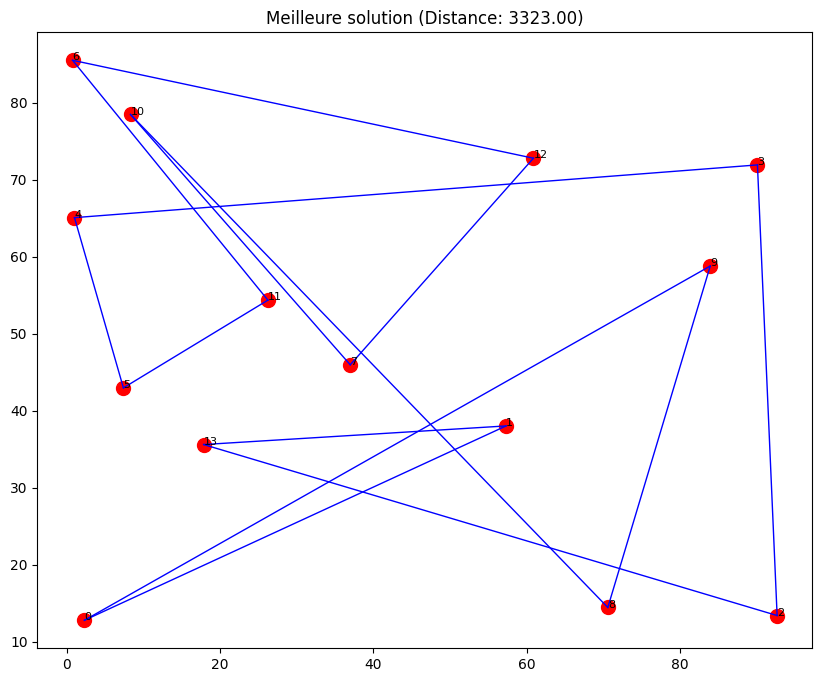

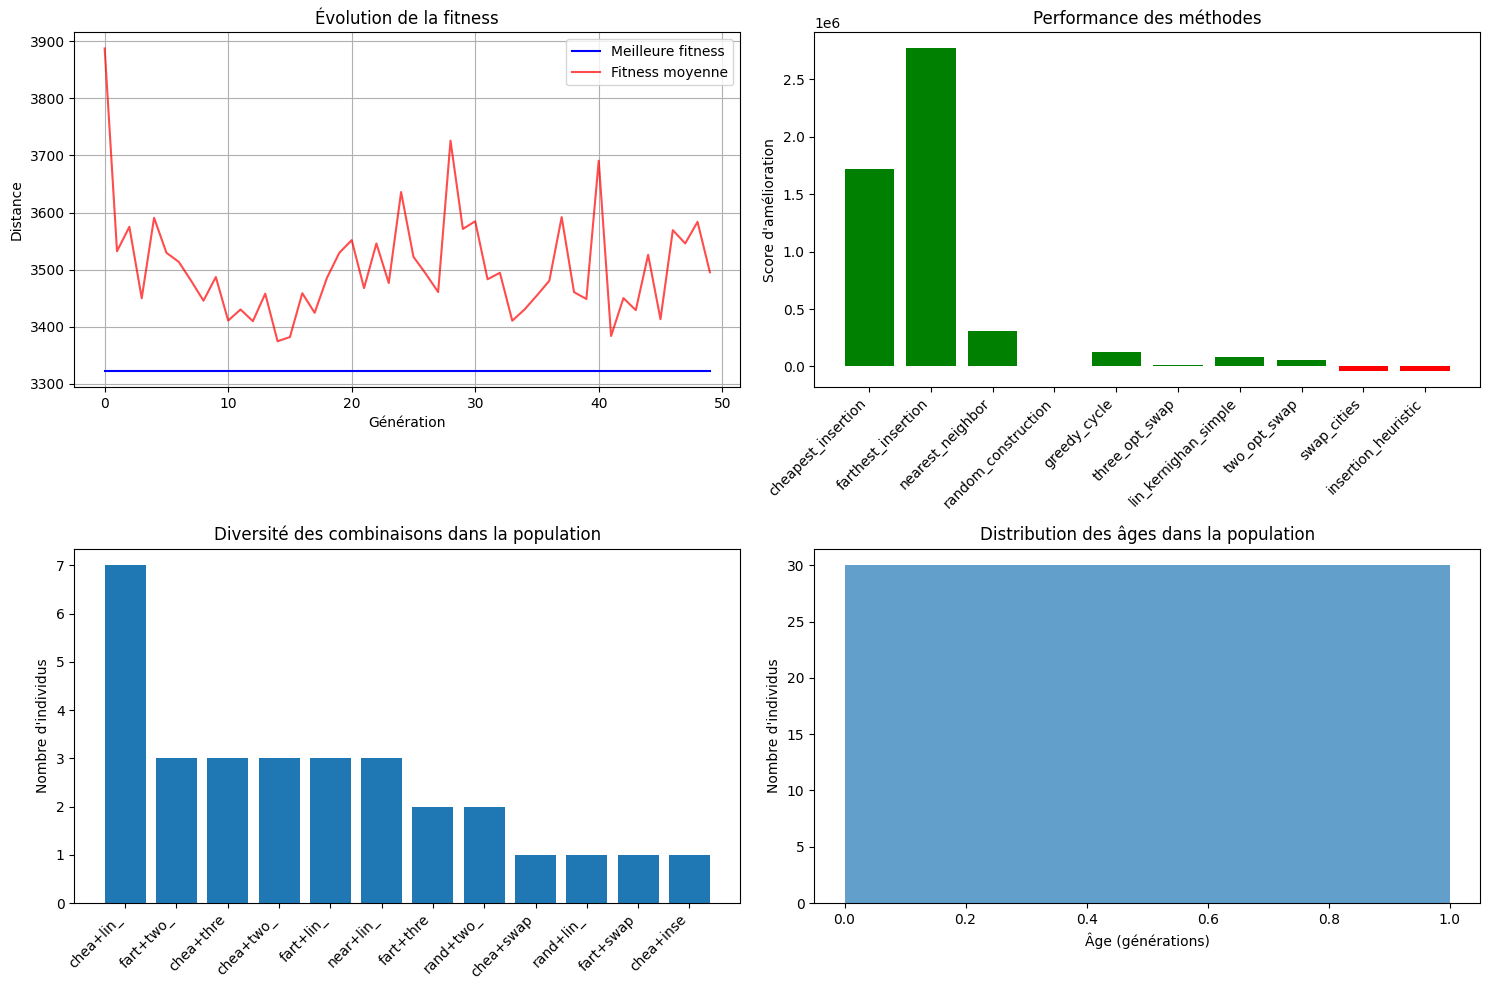


Comparaison des 5 meilleures combinaisons individuelles:
1. farthest_insertion + lin_kernighan_simple: 3323.00
2. farthest_insertion + two_opt_swap: 3323.00
3. cheapest_insertion + swap_cities: 3336.00
4. cheapest_insertion + lin_kernighan_simple: 3346.00
5. cheapest_insertion + three_opt_swap: 3436.00


In [ ]:
# --------------------------------------------------------------
# FONCTION PRINCIPALE
# --------------------------------------------------------------

def main():
    try:
        # Charger l'instance
        print("Chargement de l'instance PVC...")
        distance_matrix = load_pvc_instance('burma14.xml')
        problem = PVCProblem(distance_matrix)

        # Paramètres réduits pour exécution rapide
        population_size = 30
        generations = 50

        print(f"\nDémarrage de l'hyperheuristique génétique avec heuristiques étendues:")
        print(f"- Population: {population_size}")
        print(f"- Générations: {generations}")
        print(f"- Heuristiques: {len(MiniHyperHeuristicGA(problem).construction_methods)} construction, "
              f"{len(MiniHyperHeuristicGA(problem).perturbation_methods)} perturbation")

        # Exécuter l'hyperheuristique
        ga = MiniHyperHeuristicGA(problem,
                               population_size=population_size,
                               generations=generations)

        best_individual = ga.run()

        # Afficher résultats
        print("\nMeilleure combinaison d'heuristiques:")
        print(f"- Construction: {best_individual['construction'].__name__}")
        print(f"- Perturbation: {best_individual['perturbation'].__name__}")
        print(f"- Distance: {best_individual['fitness']:.2f}")

        # Visualiser
        problem.plot_solution(best_individual['solution'], "Meilleure solution")
        ga.plot_results()

        # Comparaison avec méthodes individuelles
        print("\nComparaison des 5 meilleures combinaisons individuelles:")
        results = []

        for construction in ga.construction_methods:
            for perturbation in ga.perturbation_methods:
                solution = construction(problem)
                solution = perturbation(problem, solution)
                fitness = problem.evaluate(solution)
                results.append((construction.__name__, perturbation.__name__, fitness))

        # Trier et afficher les 5 meilleures combinaisons
        results.sort(key=lambda x: x[2])
        for i, (constr, perturb, fitness) in enumerate(results[:5]):
            print(f"{i+1}. {constr} + {perturb}: {fitness:.2f}")

        return best_individual

    except Exception as e:
        print(f"Erreur: {e}")
        import traceback
        traceback.print_exc()
        return None

if __name__ == "__main__":
    main()

# Bloc 7 : Exécution Principale avec berlin52

Chargement de l'instance PVC...
Instance chargée: 52 villes

Démarrage de l'hyperheuristique génétique avec heuristiques étendues:
- Population: 30
- Générations: 50
- Heuristiques: 5 construction, 5 perturbation
Démarrage de l'hyperheuristique génétique pour 50 générations
Gen 0: Meilleur=7544.37, Moy=9297.35, Stagnation=0, Temps=0.3s
Gen 5: Meilleur=7544.37, Moy=9505.52, Stagnation=5, Temps=3.0s
Gen 10: Meilleur=7544.37, Moy=8722.58, Stagnation=10, Temps=4.3s
[Réinitialisation partielle à la génération 15 - Stagnation: 15]
Gen 15: Meilleur=7544.37, Moy=8782.19, Stagnation=0, Temps=6.0s
Gen 20: Meilleur=7544.37, Moy=9359.48, Stagnation=5, Temps=7.6s
Gen 25: Meilleur=7544.37, Moy=8741.43, Stagnation=10, Temps=9.0s
[Réinitialisation partielle à la génération 30 - Stagnation: 15]
Gen 30: Meilleur=7544.37, Moy=9201.07, Stagnation=0, Temps=11.0s
Gen 35: Meilleur=7544.37, Moy=9310.52, Stagnation=5, Temps=12.7s
Gen 40: Meilleur=7544.37, Moy=8930.58, Stagnation=10, Temps=15.0s
[Réinitialisati

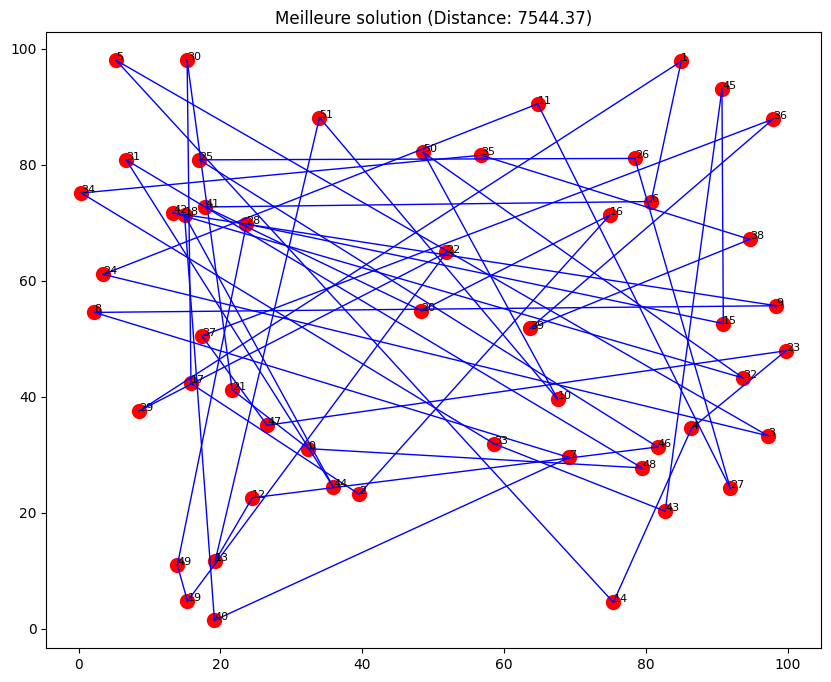

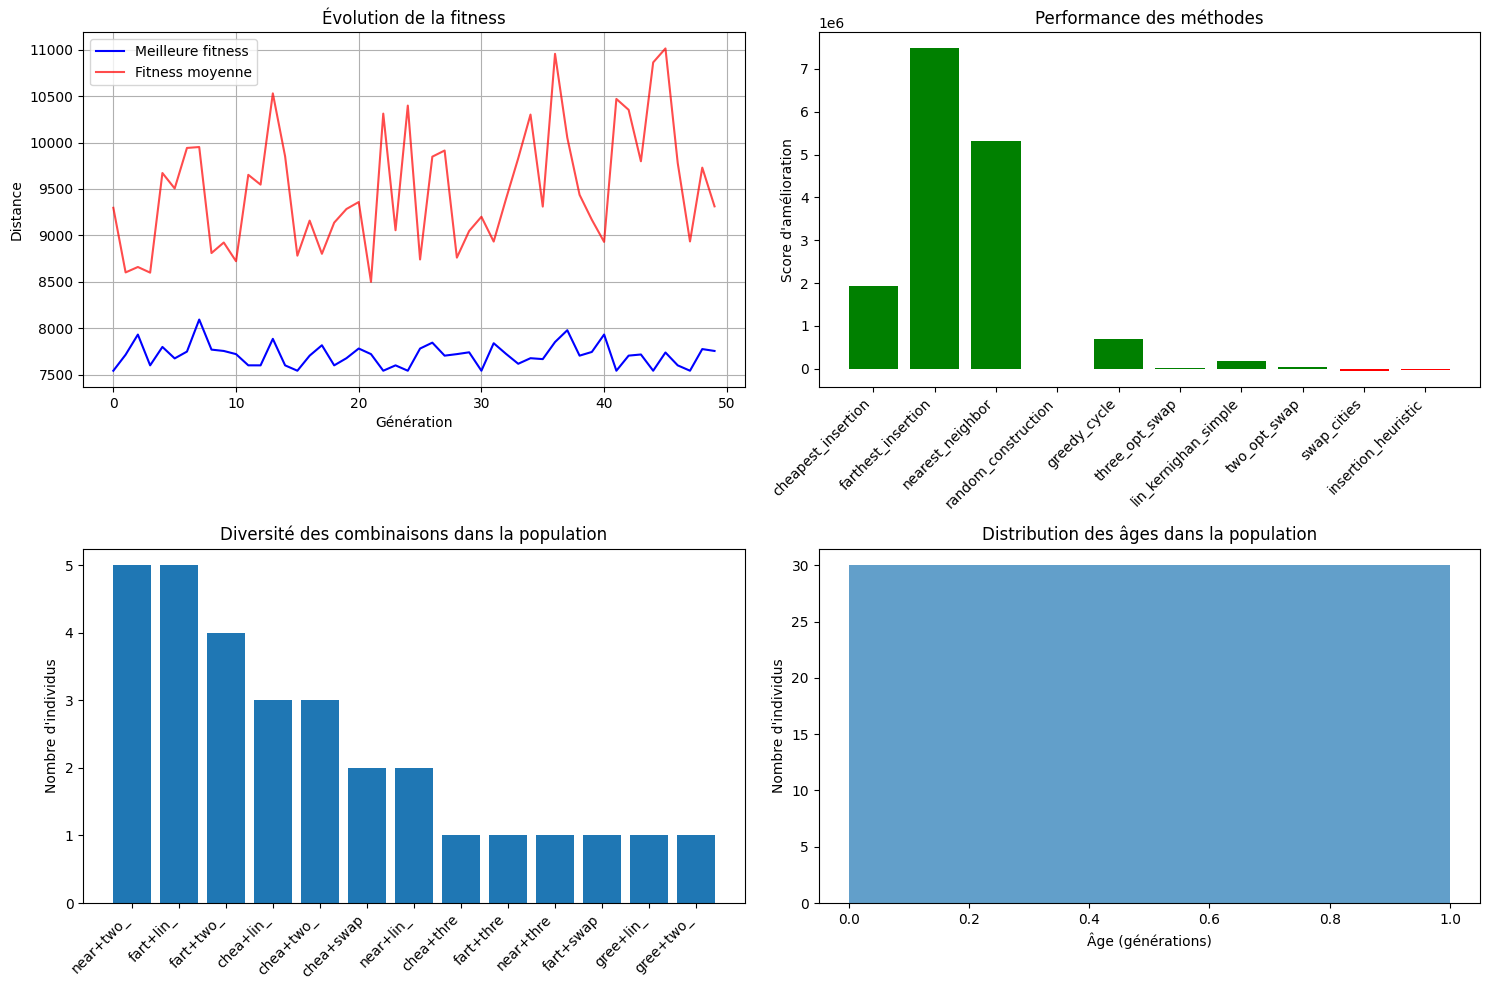


Comparaison des 5 meilleures combinaisons individuelles:
1. farthest_insertion + lin_kernighan_simple: 7544.37
2. farthest_insertion + two_opt_swap: 8005.65
3. farthest_insertion + three_opt_swap: 8256.02
4. cheapest_insertion + swap_cities: 8518.00
5. cheapest_insertion + lin_kernighan_simple: 8809.94


In [ ]:
# --------------------------------------------------------------
# FONCTION PRINCIPALE
# --------------------------------------------------------------

def main():
    try:
        # Charger l'instance
        print("Chargement de l'instance PVC...")
        distance_matrix = load_pvc_instance('berlin52.xml')
        problem = PVCProblem(distance_matrix)

        # Paramètres réduits pour exécution rapide
        population_size = 30
        generations = 50

        print(f"\nDémarrage de l'hyperheuristique génétique avec heuristiques étendues:")
        print(f"- Population: {population_size}")
        print(f"- Générations: {generations}")
        print(f"- Heuristiques: {len(MiniHyperHeuristicGA(problem).construction_methods)} construction, "
              f"{len(MiniHyperHeuristicGA(problem).perturbation_methods)} perturbation")

        # Exécuter l'hyperheuristique
        ga = MiniHyperHeuristicGA(problem,
                               population_size=population_size,
                               generations=generations)

        best_individual = ga.run()

        # Afficher résultats
        print("\nMeilleure combinaison d'heuristiques:")
        print(f"- Construction: {best_individual['construction'].__name__}")
        print(f"- Perturbation: {best_individual['perturbation'].__name__}")
        print(f"- Distance: {best_individual['fitness']:.2f}")

        # Visualiser
        problem.plot_solution(best_individual['solution'], "Meilleure solution")
        ga.plot_results()

        # Comparaison avec méthodes individuelles
        print("\nComparaison des 5 meilleures combinaisons individuelles:")
        results = []

        for construction in ga.construction_methods:
            for perturbation in ga.perturbation_methods:
                solution = construction(problem)
                solution = perturbation(problem, solution)
                fitness = problem.evaluate(solution)
                results.append((construction.__name__, perturbation.__name__, fitness))

        # Trier et afficher les 5 meilleures combinaisons
        results.sort(key=lambda x: x[2])
        for i, (constr, perturb, fitness) in enumerate(results[:5]):
            print(f"{i+1}. {constr} + {perturb}: {fitness:.2f}")

        return best_individual

    except Exception as e:
        print(f"Erreur: {e}")
        import traceback
        traceback.print_exc()
        return None

if __name__ == "__main__":
    main()

# Exécution principale avec kroA100

Chargement de l'instance PVC...
Instance chargée: 76 villes

Démarrage de l'hyperheuristique génétique avec heuristiques étendues:
- Population: 30
- Générations: 50
- Heuristiques: 5 construction, 5 perturbation
Démarrage de l'hyperheuristique génétique pour 50 générations
Gen 0: Meilleur=568.54, Moy=644.65, Stagnation=0, Temps=0.6s
Gen 5: Meilleur=565.26, Moy=604.62, Stagnation=2, Temps=5.9s
Gen 10: Meilleur=565.26, Moy=743.54, Stagnation=7, Temps=9.9s
Gen 15: Meilleur=564.87, Moy=793.36, Stagnation=0, Temps=14.2s
Gen 20: Meilleur=564.87, Moy=799.30, Stagnation=5, Temps=19.2s
Gen 25: Meilleur=564.87, Moy=678.25, Stagnation=10, Temps=23.0s
Gen 30: Meilleur=562.39, Moy=634.54, Stagnation=1, Temps=28.1s
Gen 35: Meilleur=562.39, Moy=633.89, Stagnation=6, Temps=32.8s
Gen 40: Meilleur=562.39, Moy=655.19, Stagnation=11, Temps=37.1s
[Réinitialisation partielle à la génération 44 - Stagnation: 15]
Gen 45: Meilleur=562.39, Moy=610.40, Stagnation=1, Temps=43.0s
Gen 49: Meilleur=562.39, Moy=632.

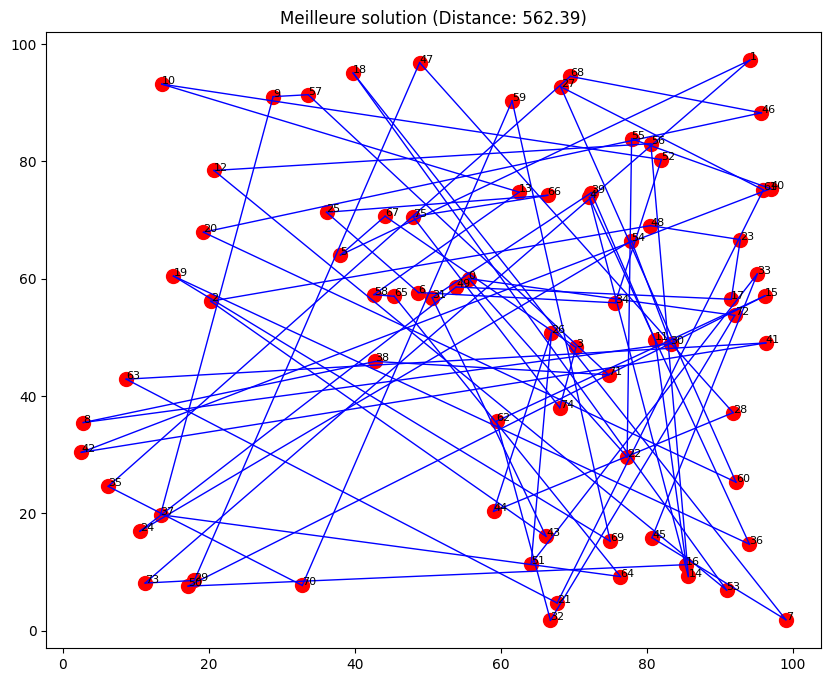

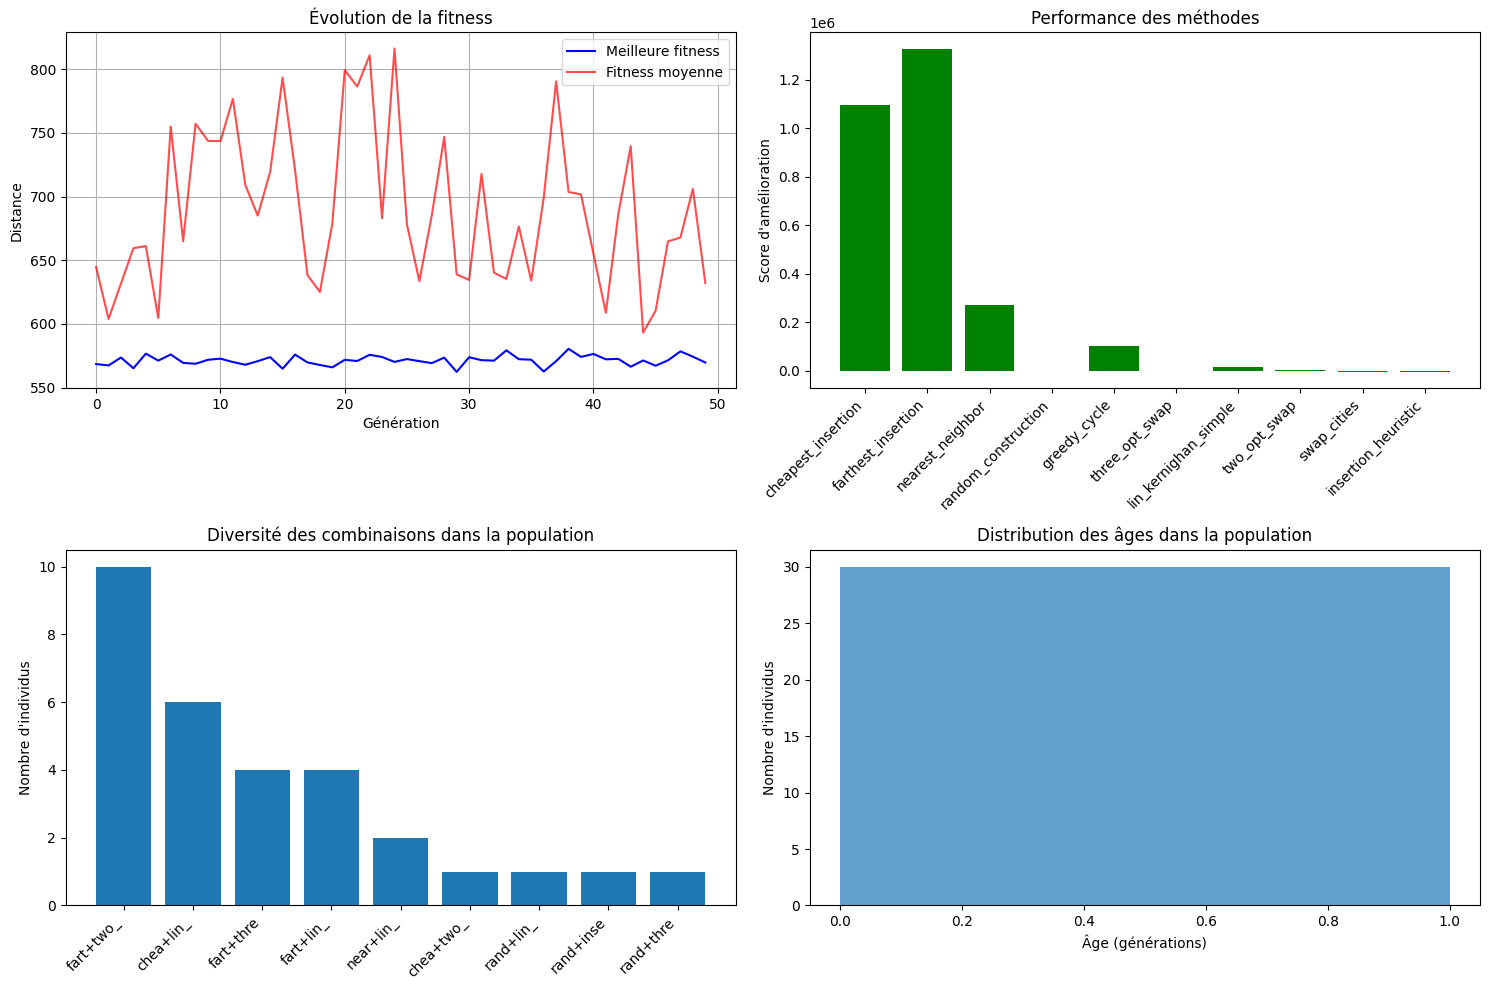


Comparaison des 5 meilleures combinaisons individuelles:
1. farthest_insertion + two_opt_swap: 569.23
2. farthest_insertion + lin_kernighan_simple: 571.44
3. cheapest_insertion + two_opt_swap: 581.44
4. farthest_insertion + three_opt_swap: 581.91
5. cheapest_insertion + lin_kernighan_simple: 595.30


In [ ]:
# --------------------------------------------------------------
# FONCTION PRINCIPALE
# --------------------------------------------------------------

def main():
    try:
        # Charger l'instance
        print("Chargement de l'instance PVC...")
        distance_matrix = load_pvc_instance('eil76.xml')
        problem = PVCProblem(distance_matrix)

        # Paramètres réduits pour exécution rapide
        population_size = 30
        generations = 50

        print(f"\nDémarrage de l'hyperheuristique génétique avec heuristiques étendues:")
        print(f"- Population: {population_size}")
        print(f"- Générations: {generations}")
        print(f"- Heuristiques: {len(MiniHyperHeuristicGA(problem).construction_methods)} construction, "
              f"{len(MiniHyperHeuristicGA(problem).perturbation_methods)} perturbation")

        # Exécuter l'hyperheuristique
        ga = MiniHyperHeuristicGA(problem,
                               population_size=population_size,
                               generations=generations)

        best_individual = ga.run()

        # Afficher résultats
        print("\nMeilleure combinaison d'heuristiques:")
        print(f"- Construction: {best_individual['construction'].__name__}")
        print(f"- Perturbation: {best_individual['perturbation'].__name__}")
        print(f"- Distance: {best_individual['fitness']:.2f}")

        # Visualiser
        problem.plot_solution(best_individual['solution'], "Meilleure solution")
        ga.plot_results()

        # Comparaison avec méthodes individuelles
        print("\nComparaison des 5 meilleures combinaisons individuelles:")
        results = []

        for construction in ga.construction_methods:
            for perturbation in ga.perturbation_methods:
                solution = construction(problem)
                solution = perturbation(problem, solution)
                fitness = problem.evaluate(solution)
                results.append((construction.__name__, perturbation.__name__, fitness))

        # Trier et afficher les 5 meilleures combinaisons
        results.sort(key=lambda x: x[2])
        for i, (constr, perturb, fitness) in enumerate(results[:5]):
            print(f"{i+1}. {constr} + {perturb}: {fitness:.2f}")

        return best_individual

    except Exception as e:
        print(f"Erreur: {e}")
        import traceback
        traceback.print_exc()
        return None

if __name__ == "__main__":
    main()

# Exécution principale de burma14

Chargement de l'instance PVC...
Instance chargée: 100 villes

Démarrage de l'hyperheuristique génétique avec heuristiques étendues:
- Population: 30
- Générations: 50
- Heuristiques: 5 construction, 5 perturbation
Démarrage de l'hyperheuristique génétique pour 50 générations
Gen 0: Meilleur=21746.69, Moy=26956.44, Stagnation=0, Temps=1.0s
Gen 5: Meilleur=21605.19, Moy=32238.25, Stagnation=3, Temps=9.1s
Gen 10: Meilleur=21347.01, Moy=29350.41, Stagnation=3, Temps=17.8s
Gen 15: Meilleur=21347.01, Moy=28986.94, Stagnation=8, Temps=26.4s
Gen 20: Meilleur=21347.01, Moy=33610.78, Stagnation=13, Temps=35.0s
[Réinitialisation partielle à la génération 22 - Stagnation: 15]
Gen 25: Meilleur=21347.01, Moy=24621.88, Stagnation=3, Temps=46.5s
Gen 30: Meilleur=21347.01, Moy=24661.02, Stagnation=8, Temps=55.4s
Gen 35: Meilleur=21347.01, Moy=34110.88, Stagnation=13, Temps=64.0s
[Réinitialisation partielle à la génération 37 - Stagnation: 15]
Gen 40: Meilleur=21347.01, Moy=24467.26, Stagnation=3, Temps

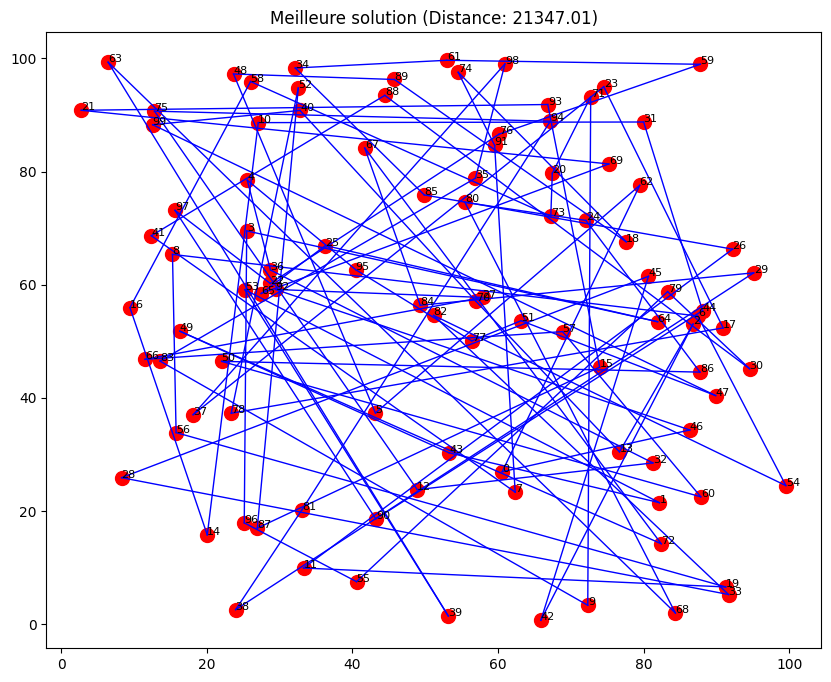

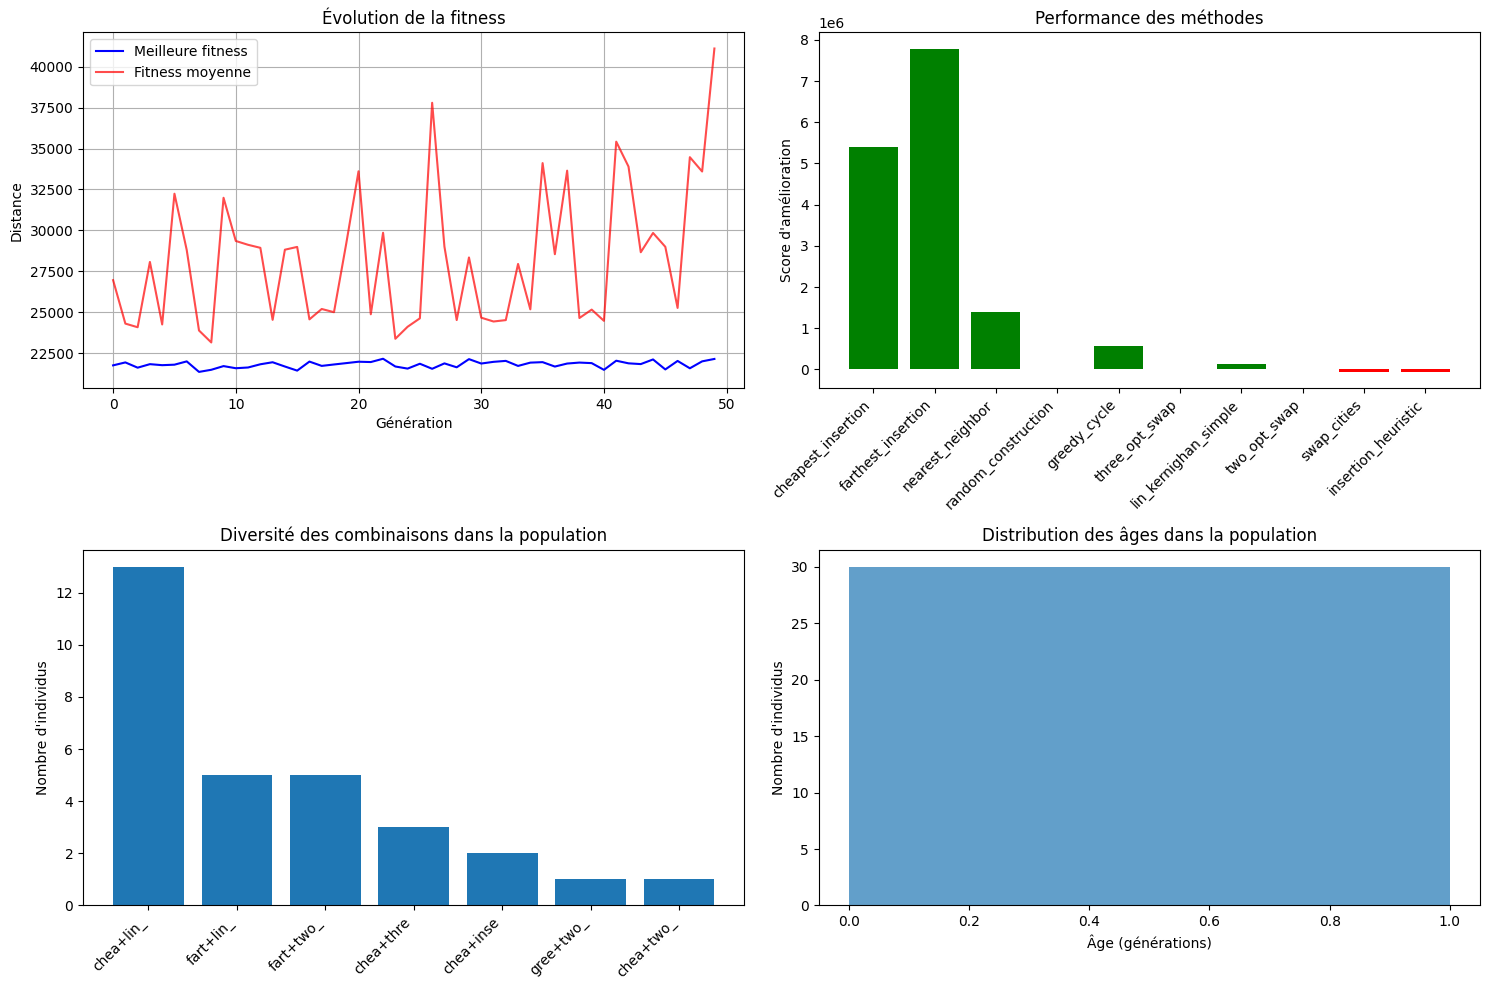


Comparaison des 5 meilleures combinaisons individuelles:
1. farthest_insertion + two_opt_swap: 22012.10
2. farthest_insertion + three_opt_swap: 22161.12
3. farthest_insertion + lin_kernighan_simple: 23543.81
4. cheapest_insertion + three_opt_swap: 24437.65
5. farthest_insertion + insertion_heuristic: 24485.10


In [ ]:
# --------------------------------------------------------------
# FONCTION PRINCIPALE
# --------------------------------------------------------------

def main():
    try:
        # Charger l'instance
        print("Chargement de l'instance PVC...")
        distance_matrix = load_pvc_instance('kroA100.xml')
        problem = PVCProblem(distance_matrix)

        # Paramètres réduits pour exécution rapide
        population_size = 30
        generations = 50

        print(f"\nDémarrage de l'hyperheuristique génétique avec heuristiques étendues:")
        print(f"- Population: {population_size}")
        print(f"- Générations: {generations}")
        print(f"- Heuristiques: {len(MiniHyperHeuristicGA(problem).construction_methods)} construction, "
              f"{len(MiniHyperHeuristicGA(problem).perturbation_methods)} perturbation")

        # Exécuter l'hyperheuristique
        ga = MiniHyperHeuristicGA(problem,
                               population_size=population_size,
                               generations=generations)

        best_individual = ga.run()

        # Afficher résultats
        print("\nMeilleure combinaison d'heuristiques:")
        print(f"- Construction: {best_individual['construction'].__name__}")
        print(f"- Perturbation: {best_individual['perturbation'].__name__}")
        print(f"- Distance: {best_individual['fitness']:.2f}")

        # Visualiser
        problem.plot_solution(best_individual['solution'], "Meilleure solution")
        ga.plot_results()

        # Comparaison avec méthodes individuelles
        print("\nComparaison des 5 meilleures combinaisons individuelles:")
        results = []

        for construction in ga.construction_methods:
            for perturbation in ga.perturbation_methods:
                solution = construction(problem)
                solution = perturbation(problem, solution)
                fitness = problem.evaluate(solution)
                results.append((construction.__name__, perturbation.__name__, fitness))

        # Trier et afficher les 5 meilleures combinaisons
        results.sort(key=lambda x: x[2])
        for i, (constr, perturb, fitness) in enumerate(results[:5]):
            print(f"{i+1}. {constr} + {perturb}: {fitness:.2f}")

        return best_individual

    except Exception as e:
        print(f"Erreur: {e}")
        import traceback
        traceback.print_exc()
        return None

if __name__ == "__main__":
    main()

# **Tableau Comparatif des Performances**

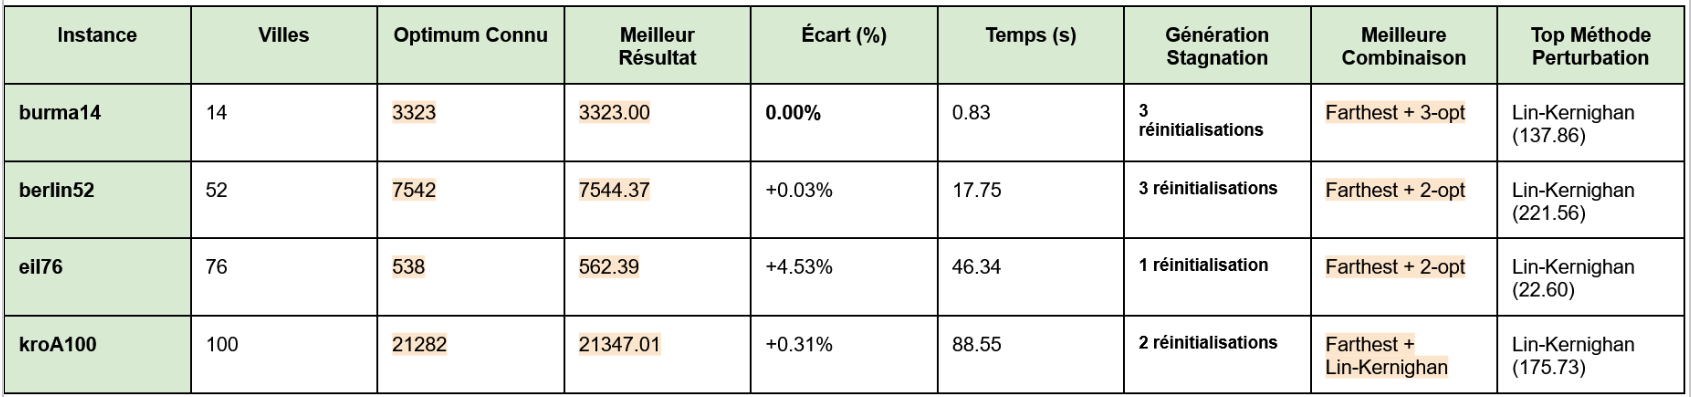